In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

try :
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow import keras


import numpy as np
import matplotlib.pyplot as plt


TensorFlow 2.x selected.


In [0]:
fashion_mnist=keras.datasets.fashion_mnist
(train_image,train_labels),(test_image,test_label)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

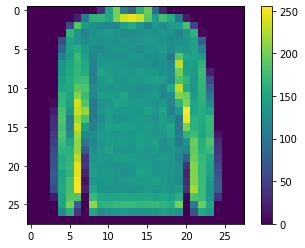

In [0]:
plt.figure()
plt.imshow(train_image[45])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_image,test_image=train_image/255.0, test_image/255.0

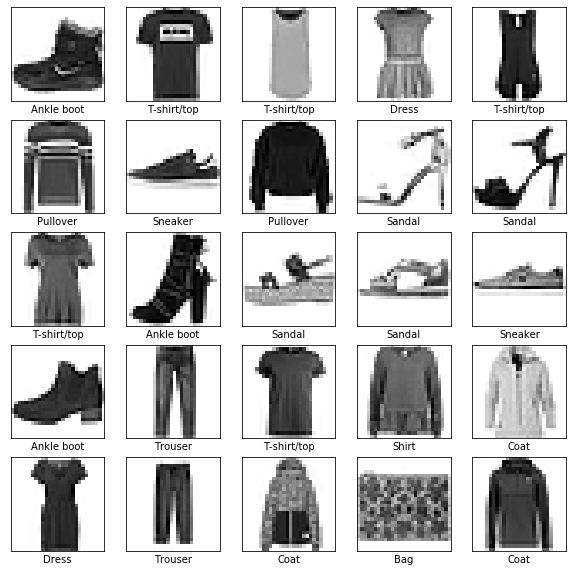

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_image[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()



In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_image,train_labels,epochs=7)

Train on 60000 samples
Epoch 1/7
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2557 - accuracy: 0.9049
Epoch 2/7
 2720/60000 [>.............................] - ETA: 4s - loss: 0.2553 - accuracy: 0.9070

KeyboardInterrupt: ignored

In [0]:
test_loss,test_acc=model.evaluate(test_image,test_label,verbose=2)

10000/1 - 0s - loss: 0.2492 - accuracy: 0.8705


In [0]:
predictions=model.predict(test_image)

In [0]:
np.argmax(predictions[5])

1

In [0]:
test_label[5]

1

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

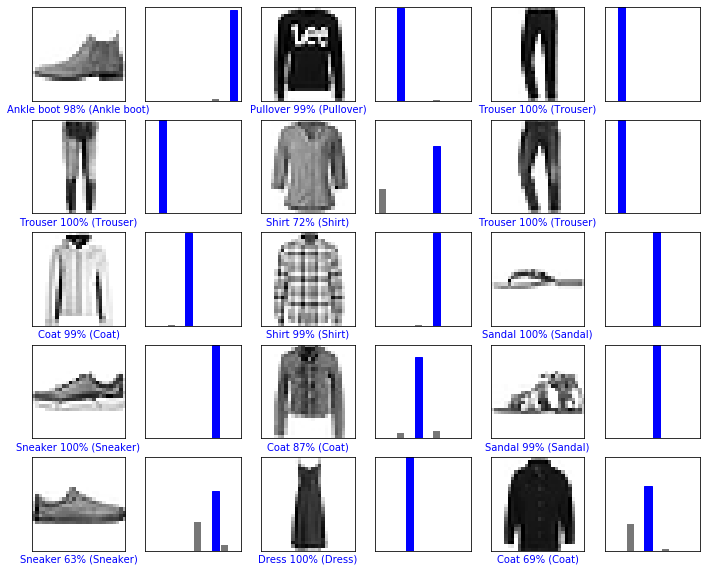

In [0]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_label, test_image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_label)
plt.show()